# COUPON CAMPAIGN FOR AIRLINE PASSENGER RETENTION - DATA PREP

## Problem Statment : 

An Airline company has started to release their new coupon campaign which target the airline passenger.

The Airline company has recently taken feedback from their 25976 customers(passengers) to know how much they enjoy the airline services. After looking at the feedback of their customers satisfaction survey and the tough market competition, to increase the customer retention rate they have decided to start the coupon campaign for the customers who are satisfied with the airline services.

Out of 25976, 11402 passengers were satisfied with the airline services. Looking at this airline team gave \\$45 discount coupon on the tickets for the passengers who were satisfied to make them a regular customer and retain them. After the coupon campaign was over they came to know that they actually made a severe loss which ultimatley resulted them in paying the amount from their own pockets. 

To avoid the same in the future, they asked USF-DSP students to help them develop a model to identify among satisfied customers whom should be given the discount coupons. They have shared the details that retaining a new customer into the airline will profit them \\$100 per customer and loosing the customer will cost them loss of \\$45 per customers. They have an additional 50,000 passengers waiting for the discount coupons.

## Data Description:

Gender: Gender of the passengers (Female, Male) <BR>
Customer Type: The customer type (Loyal customer, disloyal customer) <BR>
Age: The actual age of the passengers <BR>
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel) <BR>
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) <BR>
Flight distance: The flight distance of this journey <BR>
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) <BR>
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient <BR>
Ease of Online booking: Satisfaction level of online booking <BR>
Gate location: Satisfaction level of Gate location <BR>
Food and drink: Satisfaction level of Food and drink <BR>
Online boarding: Satisfaction level of online boarding <BR>
Seat comfort: Satisfaction level of Seat comfort <BR>
Inflight entertainment: Satisfaction level of inflight entertainment <BR>
On-board service: Satisfaction level of On-board service <BR>
Leg room service: Satisfaction level of Leg room service <BR>
Baggage handling: Satisfaction level of baggage handling <BR>
Check-in service: Satisfaction level of Check-in service <BR>
Inflight service: Satisfaction level of inflight service <BR>
Cleanliness: Satisfaction level of Cleanliness <BR>
Departure Delay in Minutes: Minutes delayed when departure <BR>
Arrival Delay in Minutes: Minutes delayed when Arrival <BR>
TARGET Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction) <BR>

## 1.0 Import and install python libraries and Set Random Seed

Here we import any Python libraries that we plan to use.

In [1]:
# import numpy and pandas libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings("ignore")

# set random seed to ensure that results are repeatable
np.random.seed(1)

## 2.0 Load data 

In [2]:
# loading the source data for preprocessing
pass_satisfy_df = pd.read_csv("C:/Users/Admin/Downloads/AirlinePassengerSatisfaction.csv")

## 3.0 Conduct initial exploration of the data
We have a number of input variables and one target variable. For this analysis, the target variable is satisfaction which is a binary column with values 'satisfied' and 'neutral or dissatisfied'.

First, our initial exploration of the data should answer the following questions:
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - this is a common problem with categorical vars where the category is mispelled or spelled differently in some instances.

In [3]:
# look at the data
pass_satisfy_df.head(5)

,Id,Ticket Number,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
# Exploring the columns
pass_satisfy_df.columns

Index(['Id', 'Ticket Number', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
# Changing the column names to upper case for easy use
pass_satisfy_df.columns = [s.strip().upper().replace(' ', '_') for s in pass_satisfy_df.columns] 

In [6]:
# Checking the column names after the change
for name in pass_satisfy_df:
    print(name)

ID
TICKET_NUMBER
GENDER
CUSTOMER_TYPE
AGE
TYPE_OF_TRAVEL
CLASS
FLIGHT_DISTANCE
INFLIGHT_WIFI_SERVICE
DEPARTURE/ARRIVAL_TIME_CONVENIENT
EASE_OF_ONLINE_BOOKING
GATE_LOCATION
FOOD_AND_DRINK
ONLINE_BOARDING
SEAT_COMFORT
INFLIGHT_ENTERTAINMENT
ON-BOARD_SERVICE
LEG_ROOM_SERVICE
BAGGAGE_HANDLING
CHECKIN_SERVICE
INFLIGHT_SERVICE
CLEANLINESS
DEPARTURE_DELAY_IN_MINUTES
ARRIVAL_DELAY_IN_MINUTES
SATISFACTION


In [7]:
# generate a basic summary of the data
pass_satisfy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 25976 non-null  int64  
 1   TICKET_NUMBER                      25976 non-null  int64  
 2   GENDER                             25976 non-null  object 
 3   CUSTOMER_TYPE                      25976 non-null  object 
 4   AGE                                25976 non-null  int64  
 5   TYPE_OF_TRAVEL                     25976 non-null  object 
 6   CLASS                              25976 non-null  object 
 7   FLIGHT_DISTANCE                    25976 non-null  int64  
 8   INFLIGHT_WIFI_SERVICE              25976 non-null  int64  
 9   DEPARTURE/ARRIVAL_TIME_CONVENIENT  25976 non-null  int64  
 10  EASE_OF_ONLINE_BOOKING             25976 non-null  int64  
 11  GATE_LOCATION                      25976 non-null  int

In [8]:
# generate a statistical summary of the numeric value in the data
pass_satisfy_df.describe()

,ID,TICKET_NUMBER,AGE,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,FOOD_AND_DRINK,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [9]:
# Check the missing values by summing the total na's for each variable
pass_satisfy_df.isna().sum()

ID                                    0
TICKET_NUMBER                         0
GENDER                                0
CUSTOMER_TYPE                         0
AGE                                   0
TYPE_OF_TRAVEL                        0
CLASS                                 0
FLIGHT_DISTANCE                       0
INFLIGHT_WIFI_SERVICE                 0
DEPARTURE/ARRIVAL_TIME_CONVENIENT     0
EASE_OF_ONLINE_BOOKING                0
GATE_LOCATION                         0
FOOD_AND_DRINK                        0
ONLINE_BOARDING                       0
SEAT_COMFORT                          0
INFLIGHT_ENTERTAINMENT                0
ON-BOARD_SERVICE                      0
LEG_ROOM_SERVICE                      0
BAGGAGE_HANDLING                      0
CHECKIN_SERVICE                       0
INFLIGHT_SERVICE                      0
CLEANLINESS                           0
DEPARTURE_DELAY_IN_MINUTES            0
ARRIVAL_DELAY_IN_MINUTES             83
SATISFACTION                          0


In [10]:
# create a list of these catagorical variables, these will be loaded from a csv file as dtype=object.
category_var_list = list(pass_satisfy_df.select_dtypes(include='object').columns)
category_var_list

['GENDER', 'CUSTOMER_TYPE', 'TYPE_OF_TRAVEL', 'CLASS', 'SATISFACTION']

In [11]:
# explore the categorical variable values - often there are typos here that need to be fixed.
for cat in category_var_list:
    print(f"Category: {cat} Values: {pass_satisfy_df[cat].unique()}")

Category: GENDER Values: ['Female' 'Male']
Category: CUSTOMER_TYPE Values: ['Loyal Customer' 'disloyal Customer']
Category: TYPE_OF_TRAVEL Values: ['Business travel' 'Personal Travel']
Category: CLASS Values: ['Eco' 'Business' 'Eco Plus']
Category: SATISFACTION Values: ['satisfied' 'neutral or dissatisfied']


### Summary the findings from our initial evaluation of the data

* We have total 25976 observations(rows) and 25 columns
* We have 5 categorical variables i.e. GENDER, CUSTOMER_TYPE, TYPE_OF_TRAVEL, CLASS, SATISFACTION
* Moreover we 1 column that have missing values i.e. ARRIVAL_DELAY_IN_MINUTES
* There doesn't seem to be a problem with the catogorical class names; as we didn't identify any typos.

## 4.0 Process the data

### 4.1 Conduct any data prepartion that should be done *BEFORE* the data split.

1. As we will not be using the ID and the TICKET_COLUMNS (TICKET_COLUMNS doesnot have any impact on the customer satisfaction)  we will drop it. 
2. We have 1 column (ARRIVAL_DELAY_IN_MINUTES) due to missing na's, we chose to drop those 83 observations(rows) in that column because as this column is dependent on the DEPARTURE_DELAY_IN_MINUTES we cannot fill them with median values. (It is seen in the data that if the observation has non-zero values in DEPARTURE_DELAY_IN_MINUTES it will genrally have non-zero values in the ARRIVAL_DELAY_IN_MINUTES as well i.e. if the flight started late there are high chances that the flight will arrive late.)
3. As there are 5 categorical variables i.e. GENDER, CUSTOMER_TYPE, TYPE_OF_TRAVEL, CLASS, SATISFACTION we will encode them with Dummy variable encoding technique. 

#### Dropping any columns/variables we will not be using

In [12]:
# Dropping ID
pass_satisfy_df.drop(['ID','TICKET_NUMBER'], axis=1, inplace = True)

#### Dropping observations with too many NA's

In [13]:
pass_satisfy_df.dropna(axis=0, inplace=True)

In [14]:
# verifying that there are now no missing values
pass_satisfy_df.isna().sum()

GENDER                               0
CUSTOMER_TYPE                        0
AGE                                  0
TYPE_OF_TRAVEL                       0
CLASS                                0
FLIGHT_DISTANCE                      0
INFLIGHT_WIFI_SERVICE                0
DEPARTURE/ARRIVAL_TIME_CONVENIENT    0
EASE_OF_ONLINE_BOOKING               0
GATE_LOCATION                        0
FOOD_AND_DRINK                       0
ONLINE_BOARDING                      0
SEAT_COMFORT                         0
INFLIGHT_ENTERTAINMENT               0
ON-BOARD_SERVICE                     0
LEG_ROOM_SERVICE                     0
BAGGAGE_HANDLING                     0
CHECKIN_SERVICE                      0
INFLIGHT_SERVICE                     0
CLEANLINESS                          0
DEPARTURE_DELAY_IN_MINUTES           0
ARRIVAL_DELAY_IN_MINUTES             0
SATISFACTION                         0
dtype: int64

In [15]:
# investigating how many rows remain 
pass_satisfy_df.shape

(25893, 23)

### Now we have total 25893 observations(rows) and 25 columns

### 4.2 Non ordered Dummy encoding
We will dummy encode the variables which are categorical

In [16]:
pass_satisfy_df = pd.concat([pass_satisfy_df, pd.get_dummies(pass_satisfy_df[category_var_list],prefix = "IS",drop_first = True)], axis=1)
pass_satisfy_df.drop(category_var_list, axis=1, inplace = True)

In [17]:
pass_satisfy_df.columns = [s.strip().upper().replace(' ', '_') for s in pass_satisfy_df.columns] 
pass_satisfy_df = pass_satisfy_df.rename(columns={'IS_SATISFIED': 'SATISFACTION'})
pass_satisfy_df

,AGE,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,FOOD_AND_DRINK,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,...,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,IS_MALE,IS_DISLOYAL_CUSTOMER,IS_PERSONAL_TRAVEL,IS_ECO,IS_ECO_PLUS,SATISFACTION
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,0,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,1,1,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,1,0,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0.0,1,1,0,0,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0.0,1,0,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0.0,0,0,1,1,0,0
25974,14,1127,3,3,3,3,4,4,4,4,...,5,4,0,0.0,1,0,0,0,0,1


### 4.3 Split data (train/test)

Splitting the data into two sets train and test for model training and testing. 

In [18]:
# split the data into validation and training set
train_df, test_df = train_test_split(pass_satisfy_df, test_size=0.3)

# to reduce repetition in later code, creating variables to represent the columns
# that are predictors and target
target = 'SATISFACTION'
predictors = list(pass_satisfy_df.columns)
predictors.remove(target)

### 4.4  Conduct any data prepartion that should be done *AFTER* the data split

1. As we dont have any missing numeric values we will dont need to impute it with mean of the variable/column
2. We will remove differences of scale by standardizing the numerical variables to bring them to a comparable unit.
3. We will be balancing the data before processing to models to remove the bias.


In [19]:
train_df

,AGE,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,FOOD_AND_DRINK,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,...,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,IS_MALE,IS_DISLOYAL_CUSTOMER,IS_PERSONAL_TRAVEL,IS_ECO,IS_ECO_PLUS,SATISFACTION
1180,44,1235,3,3,3,4,1,3,1,1,...,4,1,0,0.0,0,1,0,1,0,0
21295,39,3652,0,0,0,2,4,4,5,2,...,2,4,0,11.0,1,0,0,0,0,1
19523,22,441,4,0,4,2,2,4,5,2,...,5,2,0,0.0,0,1,0,0,0,1
12678,7,592,1,2,0,3,0,1,1,2,...,1,1,188,244.0,1,1,0,1,0,0
4222,50,1967,5,5,3,5,2,5,4,5,...,5,4,0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,55,1558,1,4,1,1,3,1,3,3,...,4,3,0,5.0,1,0,1,1,0,0
17343,20,604,5,5,5,5,4,5,4,4,...,5,4,0,0.0,0,0,0,0,0,1
5211,61,1438,2,4,2,1,3,5,5,4,...,4,4,0,9.0,0,0,1,1,0,0
12206,41,2254,2,2,2,2,5,5,4,5,...,5,5,0,0.0,1,0,0,0,0,1


# Standardize numeric values
Now, let's create a common scale between the numberic columns by standardizing each numeric column

In [20]:
# creating a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['AGE','FLIGHT_DISTANCE','INFLIGHT_WIFI_SERVICE','DEPARTURE/ARRIVAL_TIME_CONVENIENT','EASE_OF_ONLINE_BOOKING','GATE_LOCATION','FOOD_AND_DRINK','ONLINE_BOARDING', 'SEAT_COMFORT', 'INFLIGHT_ENTERTAINMENT','ON-BOARD_SERVICE','LEG_ROOM_SERVICE','BAGGAGE_HANDLING','CHECKIN_SERVICE','INFLIGHT_SERVICE','CLEANLINESS','DEPARTURE_DELAY_IN_MINUTES','ARRIVAL_DELAY_IN_MINUTES']                
               
# Transforming the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array

test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object

# Data Balancing

### Addressing any data imbalances

In [21]:
train_df[target].value_counts()

0    10204
1     7921
Name: SATISFACTION, dtype: int64

##### Bargraph for the imbalanced data

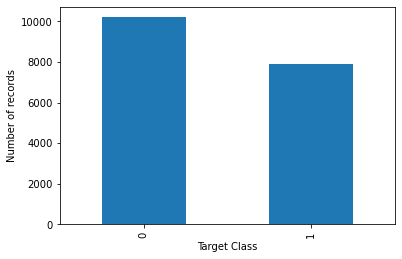

In [22]:
count = train_df[target].value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

We will utilize an oversamplying technique to address any necessary date balancing.

In [23]:
train_df[predictors].isna().sum()

AGE                                  0
FLIGHT_DISTANCE                      0
INFLIGHT_WIFI_SERVICE                0
DEPARTURE/ARRIVAL_TIME_CONVENIENT    0
EASE_OF_ONLINE_BOOKING               0
GATE_LOCATION                        0
FOOD_AND_DRINK                       0
ONLINE_BOARDING                      0
SEAT_COMFORT                         0
INFLIGHT_ENTERTAINMENT               0
ON-BOARD_SERVICE                     0
LEG_ROOM_SERVICE                     0
BAGGAGE_HANDLING                     0
CHECKIN_SERVICE                      0
INFLIGHT_SERVICE                     0
CLEANLINESS                          0
DEPARTURE_DELAY_IN_MINUTES           0
ARRIVAL_DELAY_IN_MINUTES             0
IS_MALE                              0
IS_DISLOYAL_CUSTOMER                 0
IS_PERSONAL_TRAVEL                   0
IS_ECO                               0
IS_ECO_PLUS                          0
dtype: int64

In [24]:
ros = RandomOverSampler(sampling_strategy='minority')
X_train,y_train = ros.fit_resample(train_df[predictors], train_df[target])
y_train.value_counts()

0    10204
1    10204
Name: SATISFACTION, dtype: int64

##### Bargraph for balanced data

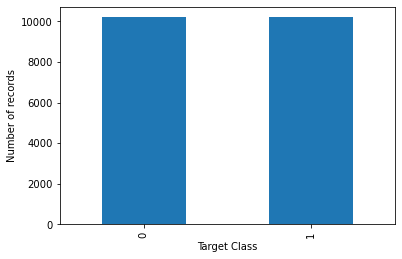

In [25]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [26]:
train_df[predictors].isna().sum()

AGE                                  0
FLIGHT_DISTANCE                      0
INFLIGHT_WIFI_SERVICE                0
DEPARTURE/ARRIVAL_TIME_CONVENIENT    0
EASE_OF_ONLINE_BOOKING               0
GATE_LOCATION                        0
FOOD_AND_DRINK                       0
ONLINE_BOARDING                      0
SEAT_COMFORT                         0
INFLIGHT_ENTERTAINMENT               0
ON-BOARD_SERVICE                     0
LEG_ROOM_SERVICE                     0
BAGGAGE_HANDLING                     0
CHECKIN_SERVICE                      0
INFLIGHT_SERVICE                     0
CLEANLINESS                          0
DEPARTURE_DELAY_IN_MINUTES           0
ARRIVAL_DELAY_IN_MINUTES             0
IS_MALE                              0
IS_DISLOYAL_CUSTOMER                 0
IS_PERSONAL_TRAVEL                   0
IS_ECO                               0
IS_ECO_PLUS                          0
dtype: int64

# 5.0 Saving the data  
Saving the data to the files for the model use.

In [27]:
X_train = train_df[predictors]
y_train = train_df[target] # train_target is now a series object
X_test = test_df[predictors]
y_test = test_df[target] # validation_target is now a series object

X_train.to_csv('./pass_satisfy_X_train.csv', index=False)
y_train.to_csv('./pass_satisfy_y_train.csv', index=False)
X_test.to_csv('./pass_satisfy_X_test.csv', index=False)
y_test.to_csv('./pass_satisfy_y_test.csv', index=False)